In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
import pandas as pd
import dateutil.parser as date
import datetime as dt
import calendar
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.precision', 7)
pd.set_option('display.max_seq_items', None)

mta_data_directory = '/Users/busola.oladapo/Documents/Github/sf19_ds15/challenges/challenge1/turnstile data'

In [3]:
def read_data(directory):
    data = pd.DataFrame()
    
    for file in os.scandir(directory):
        data = data.append(pd.read_csv(file.path))
        
    return data

# store mta data files for 3 months in a dataframe
turnstile = read_data(mta_data_directory)
print(f'Turnstile dataset: {turnstile.shape[0]} records')
turnstile.head()

Turnstile dataset: 2653353 records


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,00:00:00,REGULAR,6989774,2370411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,04:00:00,REGULAR,6989795,2370413
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,08:00:00,REGULAR,6989813,2370436
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,12:00:00,REGULAR,6989924,2370512
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,16:00:00,REGULAR,6990200,2370573


In [4]:
# remove whitespace from column names
turnstile.columns = turnstile.columns.str.strip()

# set index for turnstile data to the first four columns, uniquely identifyin a turnstile at each station
turnstile_index = ['C/A', 'UNIT', 'SCP', 'STATION']
turnstile = turnstile.set_index(turnstile_index)
turnstile.head()

LINENAME DIVISION        DATE      TIME     DESC  \
C/A  UNIT SCP      STATION                                                    
A002 R051 02-00-00 59 ST    NQR456W      BMT  03/23/2019  00:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  04:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  08:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  12:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  16:00:00  REGULAR   

                            ENTRIES    EXITS  
C/A  UNIT SCP      STATION                    
A002 R051 02-00-00 59 ST    6989774  2370411  
                   59 ST    6989795  2370413  
                   59 ST    6989813  2370436  
                   59 ST    6989924  2370512  
                   59 ST    6990200  2370573

In [5]:
# get a datetime field, day of week, and week number for each record
def get_day_of_week(row):
    return calendar.day_name[row['DATE_TIME'].weekday()]


turnstile['DATE_TIME'] = turnstile['DATE'] + ' ' + turnstile['TIME']
turnstile['DATE_TIME'] = turnstile['DATE_TIME'].apply(date.parse)
turnstile['DAY'] = turnstile.apply(get_day_of_week, axis=1)
turnstile['WEEK'] = turnstile['DATE_TIME'].dt.weekofyear
turnstile['HOUR'] = turnstile['DATE_TIME'].dt.hour
turnstile.head()

LINENAME DIVISION        DATE      TIME     DESC  \
C/A  UNIT SCP      STATION                                                    
A002 R051 02-00-00 59 ST    NQR456W      BMT  03/23/2019  00:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  04:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  08:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  12:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  16:00:00  REGULAR   

                            ENTRIES    EXITS           DATE_TIME       DAY  \
C/A  UNIT SCP      STATION                                                   
A002 R051 02-00-00 59 ST    6989774  2370411 2019-03-23 00:00:00  Saturday   
                   59 ST    6989795  2370413 2019-03-23 04:00:00  Saturday   
                   59 ST    6989813  2370436 2019-03-23 08:00:00  Saturday   
                   59 ST    6989924  2370512 2019-03-23 12:00:00  Saturday   
                   59 ST    6990200  2370573 2019-03-23 16:00:00  Saturday   

                            WEEK  HOUR  
C/A  UNIT SCP      STATION              
A002 R051 02-00-00 59 ST      12     0  
                   59 ST      12     4  
                   59 ST      12     8  
                   59 ST      12    12  
                   59 ST      12    16

In [6]:
# # get total entries and exits for each turnstile on each day
# turnstile_day = turnstile[turnstile['TIME'] == '00:00:00']
# turnstile_day = turnstile_day.reset_index()
# turnstile_day = turnstile_day.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION','DATE_TIME'])
# turnstile_day['ENTRIES/DAY'] = (turnstile_day.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['ENTRIES']
#                                 .transform(lambda x: -1 * x.diff(periods=-1)))
# turnstile_day['EXITS/DAY'] = (turnstile_day.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['EXITS']
#                                 .transform(lambda x: -1 * x.diff(periods=-1)))
# turnstile_day = turnstile_day.set_index(['C/A', 'UNIT', 'SCP', 'STATION'])
# turnstile_day.head(20)

In [7]:
# get total entries and exits for each turnstile on each day
# turnstile_day = turnstile[turnstile['TIME'] == '00:00:00']
turnstile = turnstile.reset_index()
turnstile = turnstile.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION','DATE_TIME'])
turnstile['ENTRIES/INCR'] = (turnstile.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['ENTRIES']
                                .transform(lambda x: -1 * x.diff(periods=-1)))
turnstile['EXITS/INCR'] = (turnstile.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['EXITS']
                                .transform(lambda x: -1 * x.diff(periods=-1)))
turnstile = turnstile.set_index(['C/A', 'UNIT', 'SCP', 'STATION'])
turnstile.head(20)

LINENAME DIVISION        DATE      TIME     DESC  \
C/A  UNIT SCP      STATION                                                    
A002 R051 02-00-00 59 ST    NQR456W      BMT  02/23/2019  03:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  07:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  11:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  15:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  19:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  23:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  03:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  07:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  11:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  15:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  19:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  23:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  03:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  07:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  11:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  15:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  19:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  23:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/26/2019  03:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/26/2019  07:00:00  REGULAR   

                            ENTRIES    EXITS           DATE_TIME       DAY  \
C/A  UNIT SCP      STATION                                                   
A002 R051 02-00-00 59 ST    6955483  2359112 2019-02-23 03:00:00  Saturday   
                   59 ST    6955494  2359125 2019-02-23 07:00:00  Saturday   
                   59 ST    6955554  2359199 2019-02-23 11:00:00  Saturday   
                   59 ST    6955714  2359248 2019-02-23 15:00:00  Saturday   
                   59 ST    6956004  2359292 2019-02-23 19:00:00  Saturday   
                   59 ST    6956147  2359325 2019-02-23 23:00:00  Saturday   
                   59 ST    6956177  2359332 2019-02-24 03:00:00    Sunday   
                   59 ST    6956184  2359339 2019-02-24 07:00:00    Sunday   
                   59 ST    6956215  2359388 2019-02-24 11:00:00    Sunday   
                   59 ST    6956315  2359432 2019-02-24 15:00:00    Sunday   
                   59 ST    6956472  2359469 2019-02-24 19:00:00    Sunday   
                   59 ST    6956566  2359492 2019-02-24 23:00:00    Sunday   
                   59 ST    6956582  2359496 2019-02-25 03:00:00    Monday   
                   59 ST    6956590  2359535 2019-02-25 07:00:00    Monday   
                   59 ST    6956705  2359829 2019-02-25 11:00:00    Monday   
                   59 ST    6956905  2359900 2019-02-25 15:00:00    Monday   
                   59 ST    6957645  2359978 2019-02-25 19:00:00    Monday   
                   59 ST    6957918  2360018 2019-02-25 23:00:00    Monday   
                   59 ST    6957937  2360027 2019-02-26 03:00:00   Tuesday   
                   59 ST    6957947  2360074 2019-02-26 07:00:00   Tuesday   

                            WEEK  HOUR  ENTRIES/INCR  EXITS/INCR  
C/A  UNIT SCP      STATION                                        
A002 R051 02-00-00 59 ST       8     3          11.0        13.0  
                   59 ST       8     7          60.0        74.0  
                   59 ST       8    11         160.0        49.0  
                   59 ST       8    15         290.0        44.0  
                   59 ST       8    19         143.0        33.0  
                   59 ST       8    23          30.0         7.0  
                   59 ST       8   

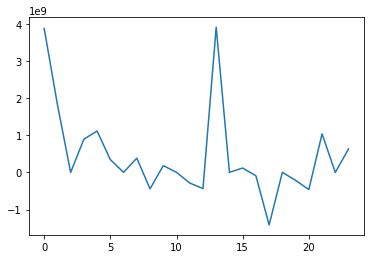

In [8]:
# turnstile.groupby('HOUR')['ENTRIES/INCR'].sum().reset_index()
entries_by_hour = turnstile.groupby('HOUR')['ENTRIES/INCR'].sum().reset_index()
plt.plot(entries_by_hour['HOUR'], entries_by_hour['ENTRIES/INCR'])

In [9]:
negative_turnstiles = turnstile[(turnstile['ENTRIES/INCR'] < 0) & (turnstile['ENTRIES/INCR'] < -1000)].reset_index()
negative_turnstiles = negative_turnstiles[['C/A', 'UNIT', 'SCP', 'STATION']]
negative_turnstiles = negative_turnstiles.drop_duplicates()
turnstile2 = turnstile.merge(negative_turnstiles, on=['C/A', 'UNIT', 'SCP', 'STATION'], how='left', indicator=True)
turnstile2 = turnstile2[turnstile2['_merge'] == 'left_only']
turnstile2 = turnstile2.drop(columns='_merge')
turnstile2.head(10)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,WEEK,HOUR,ENTRIES/INCR,EXITS/INCR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112,2019-02-23 03:00:00,Saturday,8,3,11.0,13.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125,2019-02-23 07:00:00,Saturday,8,7,60.0,74.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199,2019-02-23 11:00:00,Saturday,8,11,160.0,49.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248,2019-02-23 15:00:00,Saturday,8,15,290.0,44.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292,2019-02-23 19:00:00,Saturday,8,19,143.0,33.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,23:00:00,REGULAR,6956147,2359325,2019-02-23 23:00:00,Saturday,8,23,30.0,7.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2019,03:00:00,REGULAR,6956177,2359332,2019-02-24 03:00:00,Sunday,8,3,7.0,7.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2019,07:00:00,REGULAR,6956184,2359339,2019-02-24 07:00:00,Sunday,8,7,31.0,49.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2019,11:00:00,REGULAR,6956215,2359388,2019-02-24 11:00:00,Sunday,8,11,100.0,44.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2019,15:00:00,REGULAR,6956315,2359432,2019-02-24 15:00:00,Sunday,8,15,157.0,37.0


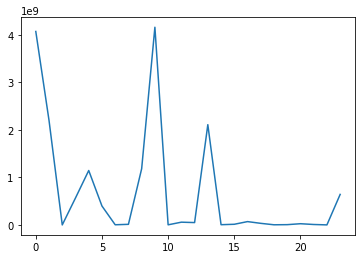

In [10]:
entries_by_hour2 = turnstile2.groupby('HOUR')['ENTRIES/INCR'].sum().reset_index()
# plt.figure(figsize=[12,7])
# plt.xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
plt.plot(entries_by_hour2['HOUR'], entries_by_hour2['ENTRIES/INCR'])


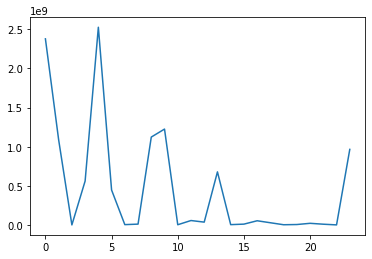

In [11]:
exits_by_hour = turnstile2.groupby('HOUR')['EXITS/INCR'].sum().reset_index()
# plt.figure(figsize=[12,7])
# plt.xticks = np.arange(len(exits_by_hour['HOUR']))
# plt.xticklabels = exits_by_hour['HOUR']
plt.plot(exits_by_hour['HOUR'], exits_by_hour['EXITS/INCR'])


In [12]:
exits_by_hour.sort_values(by='EXITS/INCR', ascending=False)

,HOUR,EXITS/INCR
4,4,2526432997.0
0,0,2378122334.0
9,9,1225005530.0
8,8,1122993815.0
1,1,1087541180.0
23,23,965511884.0
13,13,678148422.0
3,3,560827390.0
5,5,446217222.0
11,11,56350372.0


In [13]:
turnstile_4p_to_8p = turnstile2[turnstile2['HOUR'].isin([16, 17, 18, 19, 20])]
station_exits_4p_to_8p = turnstile_4p_to_8p.groupby('STATION')['EXITS/INCR'].sum().reset_index().sort_values('EXITS/INCR', ascending=False)
high10_station_exits_4p_to_8p = station_exits_4p_to_8p.head(20)
high10_station_exits_4p_to_8p


,STATION,EXITS/INCR
61,34 ST-PENN STA,3983982.0
68,42 ST-PORT AUTH,2388551.0
233,GRD CNTRL-42 ST,2309745.0
353,TIMES SQ-42 ST,2138927.0
110,86 ST,1863126.0
217,FLUSHING-MAIN,1856197.0
59,34 ST-HERALD SQ,1684977.0
9,125 ST,1621925.0
14,14 ST-UNION SQ,1592316.0
257,JKSN HT-ROOSVLT,1584443.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

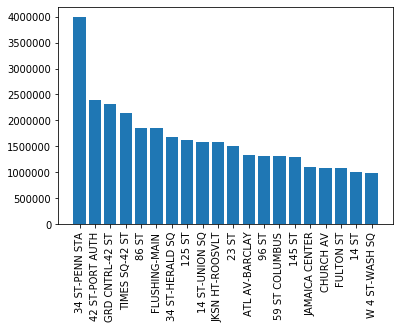

In [14]:
plt.bar(high10_station_exits_4p_to_8p['STATION'], high10_station_exits_4p_to_8p['EXITS/INCR'])
plt.xticks(rotation=90)

In [15]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# turnstile_file = '/Users/busola.oladapo/Documents/Github/Project_Benson/turnstile_181229.txt'
station_file = '/Users/busola.oladapo/Documents/Github/Project_Benson/Stations.csv'
income_file = '/Users/busola.oladapo/Documents/Github/Project_Benson/Income by Zip code.xlsx'

project_name = 'Project Benson'

In [16]:
stations = pd.read_csv(station_file)
stations['STATION'] = stations['Stop Name']
stations = stations[['STATION', 'GTFS Latitude', 'GTFS Longitude']]
stations.head()

# some stations appear to have multiple coordinates...get first
stations = stations.groupby('STATION').first().reset_index()
# stations = stations[stations['STATION'] == 'Grand Central - 42 St'].groupby('STATION').first()
stations.head()

,STATION,GTFS Latitude,GTFS Longitude
0,1 Av,40.730953,-73.981628
1,103 St,40.796092,-73.961454
2,103 St - Corona Plaza,40.749865,-73.862700
3,104 St,40.695178,-73.844330
4,110 St,40.795020,-73.944250


In [17]:
high10_station_exits_4p_to_8p.head()
# stations.head()

,STATION,EXITS/INCR
61,34 ST-PENN STA,3983982.0
68,42 ST-PORT AUTH,2388551.0
233,GRD CNTRL-42 ST,2309745.0
353,TIMES SQ-42 ST,2138927.0
110,86 ST,1863126.0


In [18]:
def clean_station_name(row):
    station = (row['STATION'].strip()
                             .replace('GRD', 'GRAND')
                             .replace('CNTRL', 'CENTRAL')
                             .replace('STA', 'STATION')
                             .replace('ROCK', 'ROCKEFELLER CTR')
                             .replace('COLUMBUS', 'COLUMBUS CIRCLE')
#                              .replace('Authority', 'AUTH')
                             .replace('42 St - Port Authority Bus Terminal', '42 ST-PORT AUTH')
#                              .replace('Bus Terminal', '')
                             .replace('MAIN', 'MAIN ST')
                             .replace('Jackson Hts - Roosevelt Av', 'JKSN HT ROOSVLT')
                             .replace(' - Parsons/Archer', '')
                             .replace('-WASH SQ', '')
                             .replace('Barclays Ctr', 'BARCLAY')
                             .replace('ATL', 'ATLANTIC')
                             .replace(' - ', ' ')
                             .replace('-', ' ')
                             .replace('.', '')
                             .upper()
                             )
    return station

# clean station names
high10_station_exits_4p_to_8p['STATION_CLEAN'] = high10_station_exits_4p_to_8p.apply(clean_station_name, axis=1)
high10_station_exits_4p_to_8p.head()

stations['STATION_CLEAN'] = stations.apply(clean_station_name, axis=1)
stations.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,STATION,GTFS Latitude,GTFS Longitude,STATION_CLEAN
0,1 Av,40.730953,-73.981628,1 AV
1,103 St,40.796092,-73.961454,103 ST
2,103 St - Corona Plaza,40.749865,-73.862700,103 ST CORONA PLAZA
3,104 St,40.695178,-73.844330,104 ST
4,110 St,40.795020,-73.944250,110 ST


In [19]:
# get station location coordinates
def create_coordinates(row):
    return str(row['GTFS Latitude']) + ', ' + str(row['GTFS Longitude'])


high_traffic_stations = pd.merge(high10_station_exits_4p_to_8p, stations, on='STATION_CLEAN', how='left')
high_traffic_stations = (high_traffic_stations.drop(columns=['STATION_CLEAN', 'STATION_y'])
                         .rename(columns={'STATION_x': 'STATION'}))
high_traffic_stations['coordinates'] = high_traffic_stations.apply(create_coordinates, axis=1)
high_traffic_stations

,STATION,EXITS/INCR,GTFS Latitude,GTFS Longitude,coordinates
0,34 ST-PENN STA,3983982.0,40.752287,-73.993391,"40.752287, -73.993391"
1,42 ST-PORT AUTH,2388551.0,40.757308,-73.989735,"40.757308, -73.989735"
2,GRD CNTRL-42 ST,2309745.0,40.751776,-73.976848,"40.751776, -73.976848"
3,TIMES SQ-42 ST,2138927.0,40.754672,-73.986754,"40.754672, -73.986754"
4,86 ST,1863126.0,40.622687,-74.028398,"40.622687, -74.028398"
5,FLUSHING-MAIN,1856197.0,40.759600,-73.830030,"40.7596, -73.83003000000001"
6,34 ST-HERALD SQ,1684977.0,40.749567,-73.987950,"40.749567, -73.98795"
7,125 ST,1621925.0,40.811109,-73.952343,"40.811109, -73.952343"
8,14 ST-UNION SQ,1592316.0,40.735736,-73.990568,"40.735735999999996, -73.99056800000001"
9,JKSN HT-ROOSVLT,1584443.0,40.746644,-73.891338,"40.746644, -73.891338"


In [20]:
geolocator = Nominatim(user_agent=project_name)

def get_zipcode(loc):
    '''
    Translates latitude/longitude coordinates to zipcode
    '''
    try:
        location = geolocator.reverse(loc)
        return (location.raw)['address']['postcode'][0:5]
    except GeocoderTimedOut:
        return get_zipcode(loc)    # try again if timeout error
    except Exception:
        return np.nan              # null if zipcode doesn't exist in result
    

high_traffic_stations['zipcode'] = high_traffic_stations['coordinates'].apply(get_zipcode)
high_traffic_stations

,STATION,EXITS/INCR,GTFS Latitude,GTFS Longitude,coordinates,zipcode
0,34 ST-PENN STA,3983982.0,40.752287,-73.993391,"40.752287, -73.993391",10018
1,42 ST-PORT AUTH,2388551.0,40.757308,-73.989735,"40.757308, -73.989735",10036
2,GRD CNTRL-42 ST,2309745.0,40.751776,-73.976848,"40.751776, -73.976848",10017
3,TIMES SQ-42 ST,2138927.0,40.754672,-73.986754,"40.754672, -73.986754",10018
4,86 ST,1863126.0,40.622687,-74.028398,"40.622687, -74.028398",11209
5,FLUSHING-MAIN,1856197.0,40.759600,-73.830030,"40.7596, -73.83003000000001",11354
6,34 ST-HERALD SQ,1684977.0,40.749567,-73.987950,"40.749567, -73.98795",10019
7,125 ST,1621925.0,40.811109,-73.952343,"40.811109, -73.952343",10040
8,14 ST-UNION SQ,1592316.0,40.735736,-73.990568,"40.735735999999996, -73.99056800000001",10003
9,JKSN HT-ROOSVLT,1584443.0,40.746644,-73.891338,"40.746644, -73.891338",11373


In [21]:
high_traffic_stations

,STATION,EXITS/INCR,GTFS Latitude,GTFS Longitude,coordinates,zipcode
0,34 ST-PENN STA,3983982.0,40.752287,-73.993391,"40.752287, -73.993391",10018
1,42 ST-PORT AUTH,2388551.0,40.757308,-73.989735,"40.757308, -73.989735",10036
2,GRD CNTRL-42 ST,2309745.0,40.751776,-73.976848,"40.751776, -73.976848",10017
3,TIMES SQ-42 ST,2138927.0,40.754672,-73.986754,"40.754672, -73.986754",10018
4,86 ST,1863126.0,40.622687,-74.028398,"40.622687, -74.028398",11209
5,FLUSHING-MAIN,1856197.0,40.759600,-73.830030,"40.7596, -73.83003000000001",11354
6,34 ST-HERALD SQ,1684977.0,40.749567,-73.987950,"40.749567, -73.98795",10019
7,125 ST,1621925.0,40.811109,-73.952343,"40.811109, -73.952343",10040
8,14 ST-UNION SQ,1592316.0,40.735736,-73.990568,"40.735735999999996, -73.99056800000001",10003
9,JKSN HT-ROOSVLT,1584443.0,40.746644,-73.891338,"40.746644, -73.891338",11373


In [22]:
data_income = pd.read_excel(income_file)
data_income = data_income[['Zip code', 'Size of adjusted gross income', 'Number of single returns', 'Number of joint returns', 'Number of head of household returns']]
data_income = data_income.rename(columns={'Zip code': 'zipcode'
                                          ,'Size of adjusted gross income': 'agi'
                                          , 'Number of single returns': 'single'
                                          , 'Number of joint returns': 'joint'
                                          , 'Number of head of household returns': 'hoh'})
data_income.head(15)


,zipcode,agi,single,joint,hoh
0,0,Total,4848730.0,2939200.0,1480010.0
1,0,"$1 under $25,000",2354910.0,445530.0,595140.0
2,0,"$25,000 under $50,000",1161980.0,441060.0,474430.0
3,0,"$50,000 under $75,000",644420.0,398720.0,216490.0
4,0,"$75,000 under $100,000",307400.0,392440.0,99910.0
5,0,"$100,000 under $200,000",293860.0,841230.0,82300.0
6,0,"$200,000 or more",86160.0,420220.0,11740.0
7,NaN,NaN,NaN,NaN,NaN
8,10001,NaN,10450.0,2540.0,1120.0
9,10001,"$1 under $25,000",2890.0,350.0,400.0


In [23]:
data_income_100_200 = data_income[data_income['agi'] == '$100,000 under $200,000']
data_income_over_200 = data_income[data_income['agi'] == '$200,000 or more']

income_zip = data_income_100_200[['zipcode', 'single']].rename(columns={'single': 'num_returns'})
data_income_100_200_hoh = data_income_100_200[['zipcode', 'hoh']].rename(columns={'hoh': 'num_returns'})
data_income_over_200['total'] = data_income_over_200['single'] + data_income_over_200['joint'] + data_income_over_200['hoh']
data_income_over_200_all = data_income_over_200[['zipcode', 'total']].rename(columns={'total': 'num_returns'})

income_zip = income_zip.append(data_income_100_200_hoh, ignore_index=True).append(data_income_over_200_all, ignore_index=True)
income_zip['zipcode'] = income_zip['zipcode'].astype('str')
income_zip = income_zip.groupby('zipcode').sum().reset_index()

income_zip.shape
income_zip.head(15)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,zipcode,num_returns
0,0,894280.0
1,10001,4220.0
2,10002,4040.0
3,10003,11130.0
4,10004,1200.0
5,10005,2670.0
6,10006,1020.0
7,10007,1970.0
8,10009,5590.0
9,10010,6960.0


In [24]:
income_zip = income_zip.sort_values(by='num_returns', ascending=False)
income_zip = income_zip[income_zip['zipcode'] != '0']
income_zip['income_rank'] = np.arange(1, len(income_zip)+1)
income_zip.head()



,zipcode,num_returns,income_rank
20,10023,14630.0,1
10,10011,12800.0,2
21,10024,12280.0,3
1540,99999,12180.0,4
42,10128,11700.0,5


In [50]:
from scipy import stats

high_traffic_stations['traffic_rank'] = np.arange(1, len(high_traffic_stations)+1)
high_traffic_stations.head()
result = pd.merge(high_traffic_stations, income_zip, on='zipcode', how='inner')
result['traffic_rank'] = stats.zscore(result['EXITS/INCR']) * 0.6
result['income_rank'] = stats.zscore(result['num_returns']) * 0.4
result['overall_rank'] = result['traffic_rank'] + result['income_rank']
result.sort_values(by='overall_rank', ascending=False)

# 34 ST-PENN STA; 42 ST-PORT AUTH; 59 ST COLUMBUS; GRD CNTRL-42 ST; 14 ST-UNION SQ

,STATION,EXITS/INCR,GTFS Latitude,GTFS Longitude,coordinates,zipcode,traffic_rank,num_returns,income_rank,overall_rank
0,34 ST-PENN STA,3983982.0,40.752287,-73.993391,"40.752287, -73.993391",10018,2.0830735,2250.0,-0.3034577,1.7796158
2,42 ST-PORT AUTH,2388551.0,40.757308,-73.989735,"40.757308, -73.989735",10036,0.6562178,5630.0,0.0102081,0.6664259
15,59 ST COLUMBUS,1319908.0,40.768296,-73.981736,"40.768296, -73.981736",10023,-0.2995109,14630.0,0.8454128,0.5459019
3,GRD CNTRL-42 ST,2309745.0,40.751776,-73.976848,"40.751776, -73.976848",10017,0.5857386,5050.0,-0.0436162,0.5421223
10,14 ST-UNION SQ,1592316.0,40.735736,-73.990568,"40.735735999999996, -73.99056800000001",10003,-0.0558859,11130.0,0.5206110,0.4647250
6,34 ST-HERALD SQ,1684977.0,40.749567,-73.987950,"40.749567, -73.98795",10019,0.0269844,9030.0,0.3257299,0.3527143
14,96 ST,1326094.0,40.791642,-73.964696,"40.791641999999996, -73.96469599999999",10025,-0.2939786,11600.0,0.5642272,0.2702487
1,TIMES SQ-42 ST,2138927.0,40.754672,-73.986754,"40.754672, -73.986754",10018,0.4329694,2250.0,-0.3034577,0.1295117
19,14 ST,1009531.0,40.740893,-74.001690,"40.740893, -74.00169",10011,-0.5770931,12800.0,0.6755879,0.0984948
4,86 ST,1863126.0,40.622687,-74.028398,"40.622687, -74.028398",11209,0.1863099,4050.0,-0.1364168,0.0498932
